In [1]:
import scipy
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats as sp
import seaborn as sns  
sns.set_style('darkgrid')

So far, we can generate eignevalues and a random change of basis matrix to get a transition matrix that will generate a unique orbit. However, these values are not going to stay bounded by 0 and 1, so we send the output priors through a sigmoid.

In [2]:
# generate eigenvalue that would come from a periodic matrix
def get_val(a=None):
    if not a:
        a = random.uniform(-0.99, 0.99)
    if a > 1 or a < -1:
        raise ValueError("a must be between -0.99 and 0.99")
    a2 = a**2
    b = math.sqrt(1-a2)
    # if you want a complex output
    #eig1 = complex(a, -b)
    #eig2 = complex(a, b)
    return a, b

In [3]:
def sigmoid(v):
    vt = 1 / (1 + np.exp(-v))
    return vt

In [4]:
def sigmoid_cycle(v, A, time):
    '''
    v is some input vector
    A is the transition matrix
    time is the number of transitions
    '''
    x = []
    y = []
    t = []
    x.append(sigmoid(v[0]))
    y.append(sigmoid(v[1]))
    t.append(0)
    for i in range(1, time):
        v = A@v
        x.append(sigmoid(v[0]))
        y.append(sigmoid(v[1]))
        t.append(i)
        
    return x, y, t

eigenvalues =  [0.2+0.9797959j 0.2-0.9797959j]
eigenvectors =  [[ 0.81859825+0.j          0.81859825-0.j        ]
 [-0.45337749-0.35262694j -0.45337749+0.35262694j]]
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
initial v =  [-0.8  0.8]


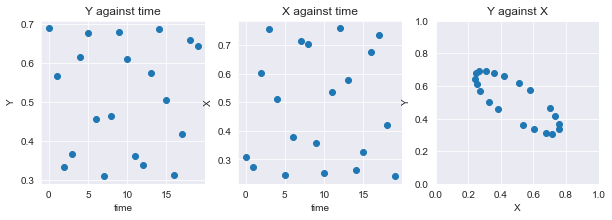

In [5]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
print("eigenvalues = ", val)
print("eigenvectors = ", vec)
print("A = ", A)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 20
x,y,t = sigmoid_cycle(v, A, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_ylim(0, 1)
ax3.set_xlim(0, 1)
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

### Error
Now let's incorporate error to see if we scale how quickly the cycle proceeds.

Error =  0.1
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
exponentiated A  =  [[ 0.815117  +0.00000000e+00j -0.31691263-2.77555756e-17j]
 [ 0.15601853-5.55111512e-17j  1.16615868+5.55111512e-17j]]
initial v =  [-0.8  0.8]


/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


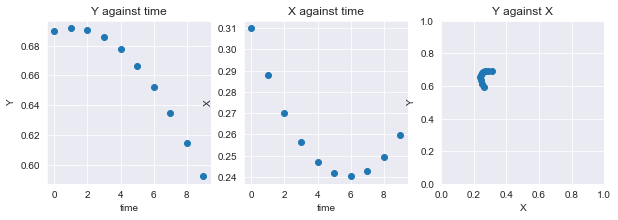

In [6]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
e = 0.1
M = scipy.linalg.fractional_matrix_power(A, e)
print("Error = ", e)
print("A = ", A)
print("exponentiated A  = ", M)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 10
x,y,t = sigmoid_cycle(v, M, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_ylim(0, 1)
ax3.set_xlim(0, 1)
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

Error =  0.4
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
exponentiated A  =  [[ 0.18409886-1.38777878e-16j -1.20897534-5.55111512e-17j]
 [ 0.59518786+1.11022302e-16j  1.52327155+1.11022302e-16j]]
initial v =  [-0.8  0.8]


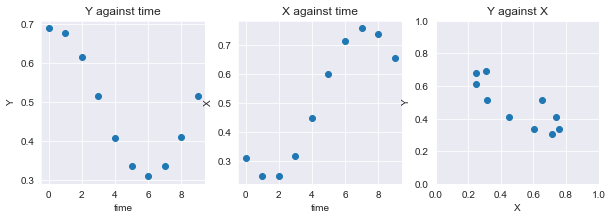

In [7]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
e = 0.4
M = scipy.linalg.fractional_matrix_power(A, e)
print("Error = ", e)
print("A = ", A)
print("exponentiated A  = ", M)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 10
x,y,t = sigmoid_cycle(v, M, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_ylim(0, 1)
ax3.set_xlim(0, 1)
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

## Normalizing the Matrix
Looks like error scaling works! Below we normalize the transition matrix. It looks as though normalizing the matrix will cause behaviors to spiral into a stable point, which can also be scaled by error.

In [8]:
# generate a transition matrix
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
print(f"Plain matrix: \n {A}")
print("The way the model is initialized in the old agents: \n", normalize(2*A-1, axis=1, norm='l2'))
print("Just L2 normalized version of the matrix: \n", normalize(A, axis=1, norm='l2'))
print("L2 norm of the matrix: \n", np.linalg.norm(A))

Plain matrix: 
 [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
The way the model is initialized in the old agents: 
 [[-0.49003845 -0.87170082]
 [ 0.54248603  0.84006482]]
Just L2 normalized version of the matrix: 
 [[-0.42232645 -0.9064438 ]
 [ 0.60864876  0.79343978]]
L2 norm of the matrix: 
 3.111466613961319


eigenvalues =  [0.2+0.9797959j 0.2-0.9797959j]
eigenvectors =  [[ 0.81859825+0.j          0.81859825-0.j        ]
 [-0.45337749-0.35262694j -0.45337749+0.35262694j]]
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
normalized A  =  [[-0.42232645 -0.9064438 ]
 [ 0.60864876  0.79343978]]
initial v =  [-0.8  0.8]


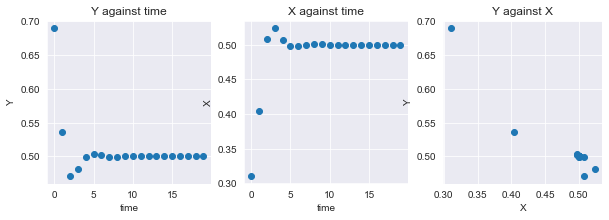

In [9]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
M = normalize(A, axis=1, norm='l2')
print("eigenvalues = ", val)
print("eigenvectors = ", vec)
print("A = ", A)
print("normalized A  = ", M)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 20
x,y,t = sigmoid_cycle(v, M, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

Error =  0.2
A =  [[-1.05973758 -2.27452619]
 [ 1.11976674  1.45973758]]
normalized A  =  [[ 0.5539643 -1.38777878e-17j -0.41927725+2.77555756e-17j]
 [ 0.2815316 -2.77555756e-17j  1.1163192 +0.00000000e+00j]]
initial v =  [-0.8  0.8]


/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


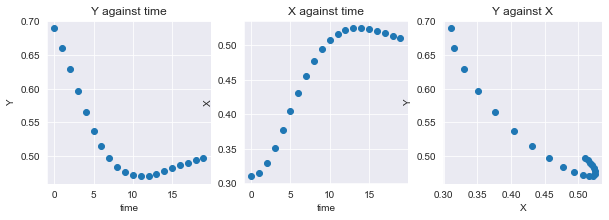

In [10]:
a, b = get_val(0.2)
M = np.array([[a, -b],
              [b, a]])
C = np.array([[4, 1],
              [4, 8]])
Ci = np.linalg.inv(C)
A = Ci@M@C
val, vec = np.linalg.eig(A)
e = 0.2
M = scipy.linalg.fractional_matrix_power(normalize(A, axis=1, norm='l2'), e)
print("Error = ", e)
print("A = ", A)
print("normalized A  = ", M)
v = np.array([-.8,.8])
print("initial v = ", v)
time = 20
x,y,t = sigmoid_cycle(v, M, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')

In [24]:
import sys 
import os
sys.path.append(os.path.abspath("../"))
from sandbox.world import World 
from sandbox.utils.utility import get_orbit_matrix, matrix_sigmoid

In [32]:
def sigmoid_cycle(v, A, error, time):
    '''
    v is some input vector
    A is the transition matrix
    time is the number of transitions
    '''
    x = []
    y = []
    t = []
    x.append(sigmoid(v[0]))
    y.append(sigmoid(v[1]))
    t.append(0)
    for i in range(1, time):
        M = scipy.linalg.fractional_matrix_power(A, error[i]).real
        v = M@v
        #v = matrix_sigmoid(v)
        v[0] = sigmoid(v[0])
        v[1] = sigmoid(v[1])
        x.append(v[0])
        y.append(v[1])
        t.append(i)
        print(v)
        
    return x, y, t

[0.07588857 0.95483926]
[9.99916759e-01 1.15225056e-05]
[9.99999780e-01 5.72976412e-09]
[9.99999984e-01 1.68391922e-10]
[9.99999999e-01 5.44123042e-12]
[1.00000000e+00 1.95812216e-13]
[1.00000000e+00 7.95686431e-15]
[1.00000000e+00 3.69980463e-16]
[1.00000000e+00 1.99380453e-17]
[1.00000000e+00 1.26043256e-18]
[1.0000000e+00 9.4551486e-20]
[1.00000000e+00 8.50743737e-21]
[1.00000000e+00 9.27369619e-22]
[1.00000000e+00 1.23602367e-22]
[1.00000000e+00 2.03120674e-23]
[1.00000000e+00 4.14658801e-24]
[1.00000000e+00 1.05852699e-24]


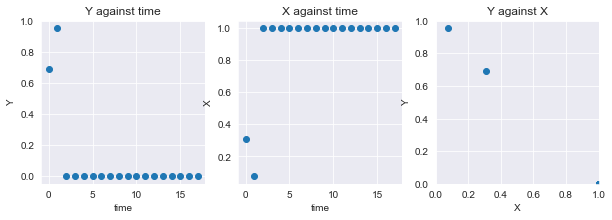

In [33]:
M = get_orbit_matrix(model_var=0.2)
v = np.array([-0.8, 0.8])
time = 18
error = np.linspace(0.1, 0.9, time)
x,y,t = sigmoid_cycle(v, M, error, time)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
ax1.scatter(t, y)
ax1.set_title("Y against time")
ax1.set_xlabel('time')
ax1.set_ylabel('Y')
ax2.scatter(t, x)
ax2.set_title("X against time")
ax2.set_xlabel('time')
ax2.set_ylabel('X')
ax3.scatter(x, y)
ax3.set_title("Y against X")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_ylim(0, 1)
ax3.set_xlim(0, 1)
ax1 = plt.gca()
ax1.set_aspect('equal', adjustable='box')